## CUSUM:  NIST Method  vs. Detecta 

Here is a comparison of CUSUM algorithm using the NIST method and detecta package. 

#### Reference:
NIST CUSUM example is from https://www.itl.nist.gov/div898/handbook/pmc/section3/pmc323.htm

          X  x-mu  Increase in Mean   S_hi  Decrease-in-mean  S_lo  CUSUM
0   324.925 -0.07           -0.3925   0.00             -0.24  0.00  -0.07
1   324.675 -0.32           -0.6425   0.00              0.01  0.01  -0.40
2   324.725 -0.27           -0.5925   0.00             -0.04  0.00  -0.67
3   324.350 -0.65           -0.9675   0.00              0.33  0.33  -1.32
4   325.350  0.35            0.0325   0.03             -0.67  0.00  -0.97
5   325.225  0.23           -0.0925   0.00             -0.54  0.00  -0.75
6   324.125 -0.88           -1.1925   0.00              0.56  0.56  -1.62
7   324.525 -0.48           -0.7925   0.00              0.16  0.72  -2.10
8   325.225  0.23           -0.0925   0.00             -0.54  0.17  -1.87
9   324.600 -0.40           -0.7175   0.00              0.08  0.25  -2.27
10  324.625 -0.38           -0.6925   0.00              0.06  0.31  -2.65
11  325.150  0.15           -0.1675   0.00             -0.47  0.00  -2.50
12  328.325  3.32            3.0075   

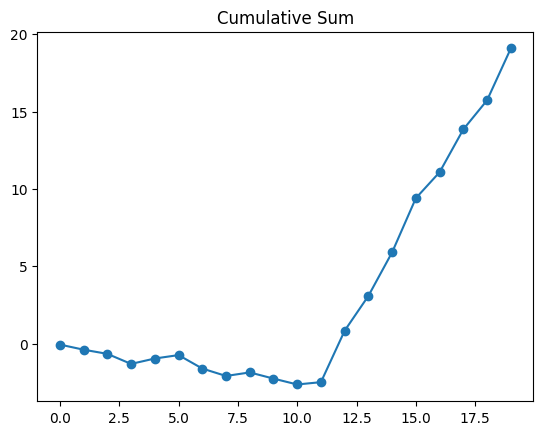

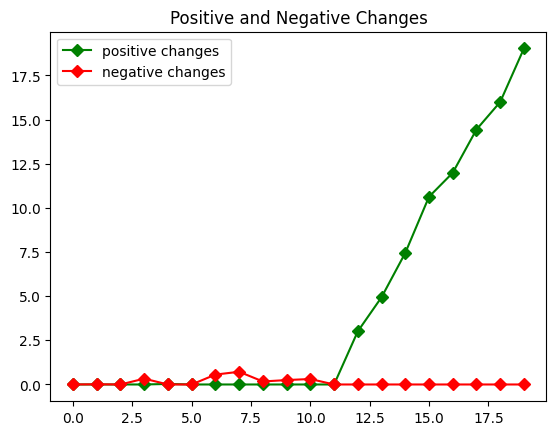

In [1]:
# Dependencies

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
    
# 1D array 
x = [324.925, 324.675, 324.725, 324.350, 325.350, 325.225, 324.125, 324.525, 325.225, 324.600, 324.625, 325.150, 328.325, 327.250, 327.825, 328.500, 326.675, 327.775, 326.875, 328.350]
x = np.array(x)
num_rows = np.array(list(range(0,20)))


mu  = 325 # mu_hat0 - in-control mean
std = np.std(x)
h   = 4.1959
k   = 0.3175


x_mean = np.zeros(num_rows.size,dtype=float)
#S_hi : for positive changes --------------------------
S_hi = np.zeros(num_rows.size,dtype=float)
S_hi[0] = 0.0 # starts with 0
#Increase in mean = x-mu-k ----------------------------
mean_hi = np.zeros(num_rows.size,dtype=float)

#Decrease in mean = mu-k-x----------------------------
mean_lo = np.zeros(num_rows.size,dtype=float)
#S_lo : for negative changes --------------------------
S_lo = np.zeros(num_rows.size,dtype=float)
S_lo[0] = 0.0 # starts with 0


#CUSUM: Cumulative sum of x minus mu ------------------
cusum = np.zeros(num_rows.size,dtype=float)
cusum[0] = 0.0 # initialize with 0


for i in range(0, num_rows.size):
    x_mean[i]  = x[i] - mu  #x_mean 
    mean_hi[i] = x[i] - mu - k
    S_hi[i]    = max(0, S_hi[i-1] + mean_hi[i])
    mean_lo[i] = mu - k - x[i]
    S_lo[i]    = max(0, S_lo[i-1] + mean_lo[i])
    cusum[i]   = cusum[i-1] + x_mean[i]

x_mean  = np.round(x_mean,decimals=2)
S_hi    = np.round(S_hi,decimals=2)
mean_lo = np.round(mean_lo,decimals=2)
S_lo    = np.round(S_lo,decimals=2)
cusum   = np.round(cusum,decimals=2)

# Construct the tabular CUSUM Chart
chart = np.array([])
chart = np.column_stack((x.T, x_mean.T, mean_hi.T, S_hi.T, mean_lo.T, S_lo.T, cusum.T))
np.round(chart, 2)

#d = 2 *(np.log((1-0.01) / (0.0027)))
#h = d * 0.5 # h= d*k where k=0.5
#h = 4 # as per the NIST doc on CUSUM

#l1 =  np.append(num_rows, data_tabular, axis = 1)
#l1 = np.concatenate(num_rows.T, data_tabular.T)
#chart = np.column_stack((num_rows.T, data_tabular.T))
#chart

np.set_printoptions(suppress=True,
   formatter={'float_kind':'{:0.2f}'.format})
#print("CUSUM Chart is:\n", np.round(chart,decimals=2))
#x_mean

df = pd.DataFrame(chart) 
df.columns = ['X','x-mu','Increase in Mean', 'S_hi', 'Decrease-in-mean', 'S_lo', 'CUSUM']
#print(cusum)
print(df)

plt.plot(cusum, "-o")
plt.title('Cumulative Sum')
plt.show()

plt.plot(S_hi,  '-gD', label='positive changes')
plt.plot(S_lo, '-rD', label='negative changes')
plt.title('Positive and Negative Changes')
plt.legend()
plt.show()

##### CUSUM using Detecta for the same data used in the NIST method

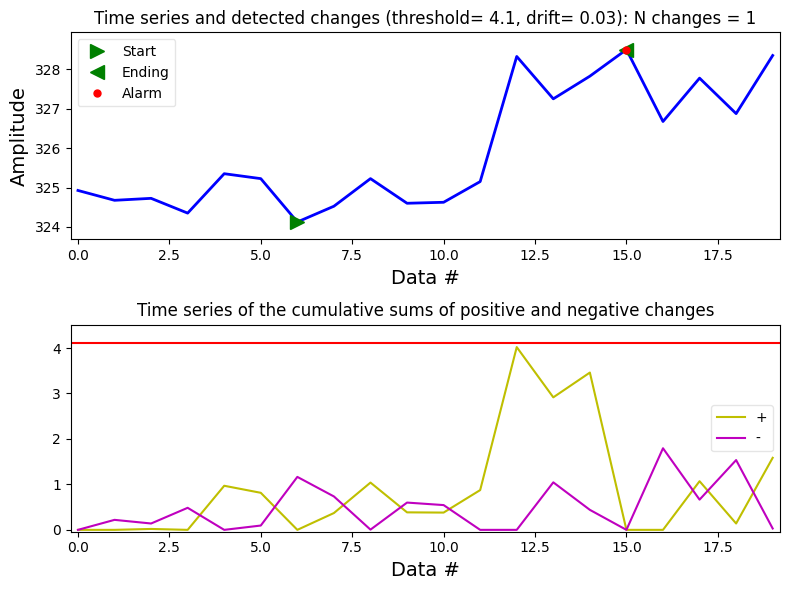

In [22]:
#Use the above data for Detecta package
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

import detecta
from detecta import detect_cusum

ta, tai, taf, amp = detect_cusum(x, 4.1, .03, True, True)

#### CUSUM of the AUCs using NIST Method

In [3]:
#Use the AUCs for NIST Method

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import math



# Load testAUCs for day0-200
x = np.load('test_AUC-Day0-200.npy')
x = np.array(x)

num_rows = np.shape(x)[0]

#in_control_rows = num_rows // 2
#num_rows
in_control_auc = x[:100]

mu   = np.mean(in_control_auc)
std  = np.std(in_control_auc)
h    = 0.5     # Similar to threshold from the detecta package - upper and lower limits 4 is the default value
k    = 0.05     # Similar to drift in the quantile calculation previous run h=0.05, k=0.03

x_mean = np.zeros(num_rows,dtype=float)
#S_hi : for positive changes --------------------------
S_hi = np.zeros(num_rows,dtype=float)
S_hi[0] = 0.0 # starts with 0
#Increase in mean = x-mu-k ----------------------------
mean_hi = np.zeros(num_rows,dtype=float)

#Decrease in mean = mu-k-x----------------------------
mean_lo = np.zeros(num_rows,dtype=float)
#S_lo : for negative changes --------------------------
S_lo = np.zeros(num_rows,dtype=float)
S_lo[0] = 0.0 # starts with 0


#CUSUM: Cumulative sum of x minus mu ------------------
cusum = np.zeros(num_rows,dtype=float)
cusum[0] = 0.0 # initialize with 0


for i in range(0, num_rows):
    x_mean[i]  = x[i] - mu  #x_mean 
    mean_hi[i] = x[i] - mu - k
    S_hi[i]    = max(0, S_hi[i-1] + mean_hi[i])
    mean_lo[i] = mu - k - x[i]
    S_lo[i]    = max(0, S_lo[i-1] + mean_lo[i])
    cusum[i]   = cusum[i-1] + x_mean[i]

x_mean  = np.round(x_mean,decimals=2)
S_hi    = np.round(S_hi,decimals=2)
mean_lo = np.round(mean_lo,decimals=2)
S_lo    = np.round(S_lo,decimals=2)
cusum   = np.round(cusum,decimals=2)

# Construct the tabular CUSUM Chart
chart = np.array([])
chart = np.column_stack((x.T, x_mean.T, mean_hi.T, S_hi.T, mean_lo.T, S_lo.T, cusum.T))
np.round(chart, 2)

#d = 2 *(np.log((1-0.01) / (0.0027)))
#h = d * 0.5 # h= d*k where k=0.5
#h = 4 # as per the NIST doc on CUSUM

#l1 =  np.append(num_rows, data_tabular, axis = 1)
#l1 = np.concatenate(num_rows.T, data_tabular.T)
#chart = np.column_stack((num_rows.T, data_tabular.T))
#chart

np.set_printoptions(suppress=True,
   formatter={'float_kind':'{:0.2f}'.format})
#print("CUSUM Chart is:\n", np.round(chart,decimals=2))
#x_mean

df = pd.DataFrame(chart) 
df.columns = ['X','x-mu','Increase in Mean', 'S_hi', 'Decrease-in-mean', 'S_lo', 'CUSUM']

print(df.to_string())
#print(chart)

# False positive rate 
falsePos = 0
alarms   = 0
for i in range(0, num_rows):
    if S_lo[i] > h:    # h    = 0.5
        alarms += 1
        if (i<100) or (i>199 and I<300) or (i>399 and I<500) or (i>599 and I<700) or (i>599 and I<700) or (i>799 and I<900) or (i>999 and I<1100) or (i>1199 and I<1300) or (i>1399 and I<1500) or (i>1599 and I<1700) or (i>1799 and I<1900):
            falsePos += 1

#print ("number of alarms", alarms)  
#print ("number of false positives", falsePos)  
        

            X  x-mu  Increase in Mean  S_hi  Decrease-in-mean  S_lo  CUSUM
0    0.977273  0.11          0.064107  0.06             -0.16  0.00   0.11
1    0.798611 -0.06         -0.114554  0.00              0.01  0.01   0.05
2    0.814010 -0.05         -0.099156  0.00             -0.00  0.01   0.00
3    0.940972  0.08          0.027807  0.03             -0.13  0.00   0.08
4    0.894841  0.03         -0.018324  0.01             -0.08  0.00   0.11
5    0.820034 -0.04         -0.093132  0.00             -0.01  0.00   0.07
6    0.835069 -0.03         -0.078096  0.00             -0.02  0.00   0.04
7    0.941224  0.08          0.028058  0.03             -0.13  0.00   0.12
8    0.851047 -0.01         -0.062119  0.00             -0.04  0.00   0.10
9    0.920000  0.06          0.006834  0.01             -0.11  0.00   0.16
10   0.838141 -0.03         -0.075025  0.00             -0.02  0.00   0.14
11   0.850000 -0.01         -0.063166  0.00             -0.04  0.00   0.12
12   0.816667 -0.05      

In [4]:
print ("number of alarms", alarms)  
print ("number of false positives", falsePos) 

number of alarms 70
number of false positives 0


In [5]:
mu
#x = np.load('test_AUC-Day0-200.npy')
#np.savetxt("AUC.csv", x, delimiter=",")

d = 2 *(np.log((1-0.01) / (0.0027)))
h = d * 0.05 # h= d*k where k=0.05
#h = 4 # as per the NIST doc on CUSUM
#h



0.5904453170118352

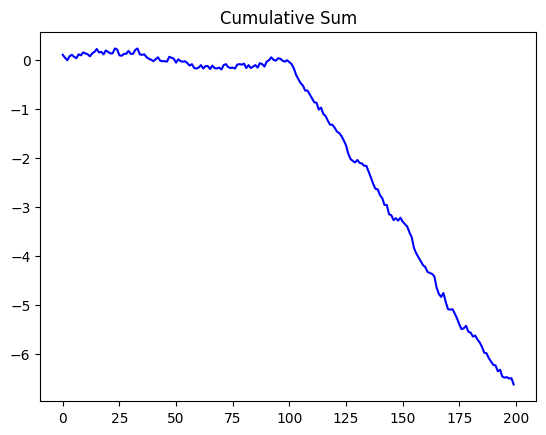

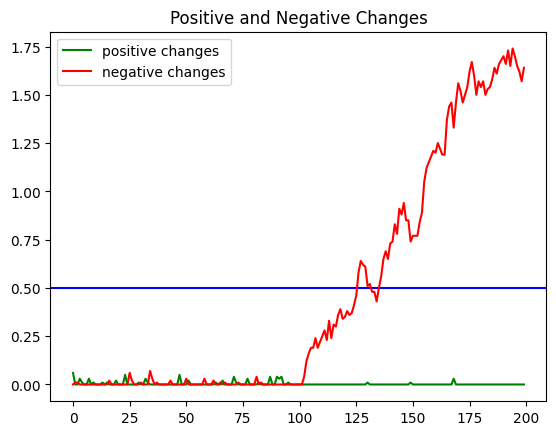

In [6]:
#CUSUM
plt.plot(cusum, '-b')
plt.title('Cumulative Sum')
plt.show()

# specifying horizontal line type
plt.axhline(y = 0.5, color = 'b', linestyle = '-')
plt.plot(S_hi,  '-g', label='positive changes')
plt.plot(S_lo, '-r', label='negative changes')
plt.title('Positive and Negative Changes')
plt.legend()
plt.show()

In [7]:
#Use the AUCs for NIST Method for 10 runs - 10*200 days
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load testAUCs for day0-2000
x = np.load('test_AUC-Day0-2000.npy')
x = np.array(x)

num_rows = np.shape(x)[0]

#in_control_rows = num_rows // 2
#num_rows
in_control_auc = x[:100]

mu   = np.mean(in_control_auc)
std  = np.std(in_control_auc)
h    = 0.2     # A difference of 0.5 AUC will be considered out of control - Similar to threshold from the detecta package
k    = 0.05     # Similar to drift in the quantile calculation 
#h    = 0.5      # Similar to threshold from the detecta package - upper and lower limits 4 is the default value
#k    = 0.05 

x_mean = np.zeros(num_rows,dtype=float)
#S_hi : for positive changes --------------------------
S_hi = np.zeros(num_rows,dtype=float)
S_hi[0] = 0.0 # starts with 0
#Increase in mean = x-mu-k ----------------------------
mean_hi = np.zeros(num_rows,dtype=float)

#Decrease in mean = mu-k-x----------------------------
mean_lo = np.zeros(num_rows,dtype=float)
#S_lo : for negative changes --------------------------
S_lo = np.zeros(num_rows,dtype=float)
S_lo[0] = 0.0 # starts with 0


#CUSUM: Cumulative sum of x minus mu ------------------
cusum = np.zeros(num_rows,dtype=float)
cusum[0] = 0.0 # initialize with 0


for i in range(0, num_rows):
    x_mean[i]  = x[i] - mu  #x_mean 
    mean_hi[i] = x[i] - mu - k
    S_hi[i]    = max(0, S_hi[i-1] + mean_hi[i])
    mean_lo[i] = mu - k - x[i]
    S_lo[i]    = max(0, S_lo[i-1] + mean_lo[i])
    cusum[i]   = cusum[i-1] + x_mean[i]

x_mean  = np.round(x_mean,decimals=2)
S_hi    = np.round(S_hi,decimals=2)
mean_lo = np.round(mean_lo,decimals=2)
S_lo    = np.round(S_lo,decimals=2)
cusum   = np.round(cusum,decimals=2)

# Construct the tabular CUSUM Chart
chart = np.array([])
chart = np.column_stack((x.T, x_mean.T, mean_hi.T, S_hi.T, mean_lo.T, S_lo.T, cusum.T))
np.round(chart, 2)

#d = 2 *(np.log((1-0.01) / (0.0027)))
#h = d * 0.5 # h= d*k where k=0.5
#h = 4 # as per the NIST doc on CUSUM

#l1 =  np.append(num_rows, data_tabular, axis = 1)
#l1 = np.concatenate(num_rows.T, data_tabular.T)
#chart = np.column_stack((num_rows.T, data_tabular.T))
#chart

np.set_printoptions(suppress=True,
   formatter={'float_kind':'{:0.2f}'.format})
#print("CUSUM Chart is:\n", np.round(chart,decimals=2))
#x_mean

df = pd.DataFrame(chart) 
df.columns = ['X','x-mu','Increase in Mean', 'S_hi', 'Decrease-in-mean', 'S_lo', 'CUSUM']

print(df.to_string())
#print(chart)

# False positives 
falsePos = 0
alarms   = 0
for i in range(0, num_rows):
    if (S_lo[i] > h):    # h    = 0.5
        alarms += 1
        #print(S_lo[i])
        if ((i<100) or (i>199 and i<300) or (i>399 and i<500) or (i>599 and i<700) or (i>599 and i<700) or (i>799 and i<900) or (i>999 and i<1100) or (i>1199 and i<1300) or (i>1399 and i<1500) or (i>1599 and i<1700) or (i>1799 and i<1900)):
            falsePos += 1

# Delay to detect the first changepoint
delay = 0
for i in range(0, num_rows):
    if (S_lo[i] > h):
        delay = i-100
        break
    

             X  x-mu  Increase in Mean  S_hi  Decrease-in-mean  S_lo  CUSUM
0     0.919872  0.06          0.007367  0.01             -0.11  0.00   0.06
1     0.863929  0.00         -0.048576  0.00             -0.05  0.00   0.06
2     0.972222  0.11          0.059717  0.06             -0.16  0.00   0.17
3     0.873264  0.01         -0.039241  0.02             -0.06  0.00   0.18
4     0.840000 -0.02         -0.072505  0.00             -0.03  0.00   0.16
5     0.814236 -0.05         -0.098269  0.00             -0.00  0.00   0.11
6     0.862132 -0.00         -0.050373  0.00             -0.05  0.00   0.11
7     0.839901 -0.02         -0.072603  0.00             -0.03  0.00   0.09
8     0.896613  0.03         -0.015892  0.00             -0.08  0.00   0.12
9     0.970588  0.11          0.058083  0.06             -0.16  0.00   0.23
10    0.794745 -0.07         -0.117759  0.00              0.02  0.02   0.16
11    0.921474  0.06          0.008969  0.01             -0.11  0.00   0.22
12    0.8916

In [8]:
print ("number of alarms", alarms)  
print ("number of false positives", falsePos) 
print ("Delay to detect", delay)

number of alarms 1164
number of false positives 281
Delay to detect 7


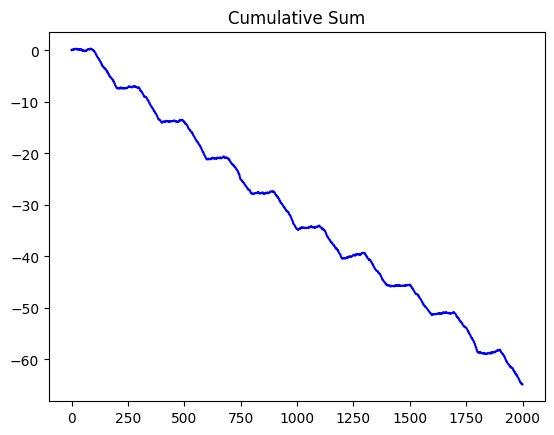

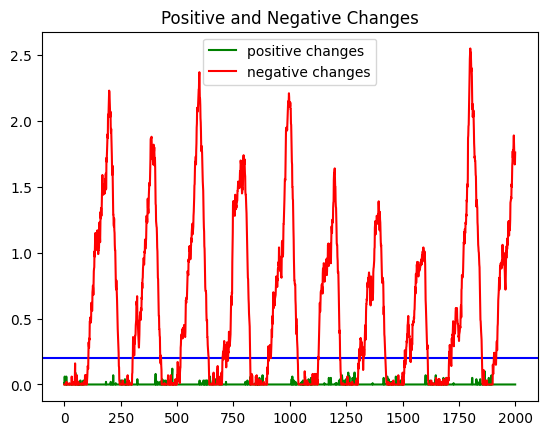

In [9]:
#CUSUM
# only one line may be specified; full height
#plt.axvline(x = 100, color = 'r', label = 'axvline - full height')
plt.plot(cusum, 'b')
plt.title('Cumulative Sum')
plt.show()


# specifying horizontal line type
plt.axhline(y = 0.2, color = 'b', linestyle = '-')
plt.plot(S_hi,  '-g', label='positive changes')
plt.plot(S_lo, '-r', label='negative changes')
plt.title('Positive and Negative Changes')
plt.legend()
plt.show()